# Bike Sharing  -  Machine Learning Project

### Problem definition :

- Predict daily bike rental demand (cnt) from calendar and weather features to help optimize staffing, bike distribution, and promotions.

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("day.csv") 

In [5]:
pd.set_option("display.max_columns", None)  
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
df.shape

(731, 16)

In [9]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

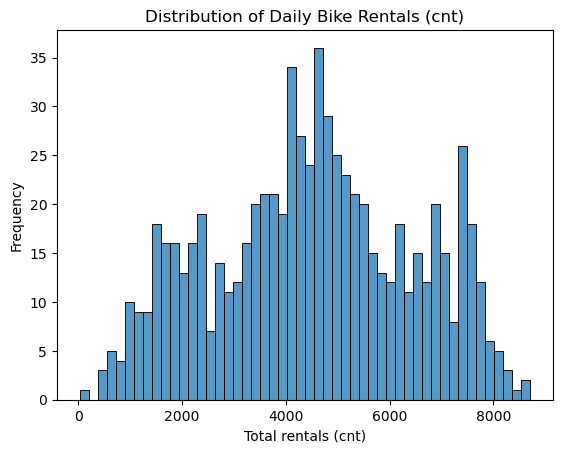

Mean: 4504.3488372093025
Median: 4548.0
Min: 22
Max: 8714


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of target variable

sns.histplot(df["cnt"], bins=50)

plt.title("Distribution of Daily Bike Rentals (cnt)")
plt.xlabel("Total rentals (cnt)")
plt.ylabel("Frequency")

plt.show()

print("Mean:", df["cnt"].mean())
print("Median:", df["cnt"].median())
print("Min:", df["cnt"].min())
print("Max:", df["cnt"].max())


In [11]:

X = df.drop(columns=["cnt", "casual", "registered", "instant", "dteday"])

y = df["cnt"]


In [12]:
print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("\nFeature columns:")
print(X.columns.tolist())

Features shape: (731, 11)
Target shape: (731,)

Feature columns:
['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


print("Train size:", X_train.shape, "Test size:", X_test.shape)


Train size: (584, 11) Test size: (147, 11)


In [14]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


categorical_features = ["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]

numeric_features = ["temp", "atemp", "hum", "windspeed"]


preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ("num", StandardScaler(), numeric_features)
    ]
)


preprocessor.fit(X_train)


X_train_transformed = preprocessor.transform(X_train)

X_test_transformed = preprocessor.transform(X_test)

print("Transformed train shape:", X_train_transformed.shape)
print("\nTransformed test shape:", X_test_transformed.shape)




Transformed train shape: (584, 36)

Transformed test shape: (147, 36)


#### Model 1 : Linear Regression

In [16]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


y_pred_baseline = np.repeat(y_train.mean(), len(y_test))

baseline_mae = mean_absolute_error(y_test, y_pred_baseline)

print("Baseline MAE:", baseline_mae)


lin_reg = LinearRegression()


lin_reg.fit(X_train_transformed, y_train)


y_pred_lin = lin_reg.predict(X_test_transformed)


mae = mean_absolute_error(y_test, y_pred_lin)

rmse = np.sqrt(mean_squared_error(y_test, y_pred_lin))

r2 = r2_score(y_test, y_pred_lin)

print("\nLinear Regression Results:")
print("\nMAE:", mae)
print("\nRMSE:", rmse)
print("\nR²:", r2)


Baseline MAE: 1711.990925822384

Linear Regression Results:

MAE: 579.8095238095239

RMSE: 791.4115607592558

R²: 0.8438028317472978


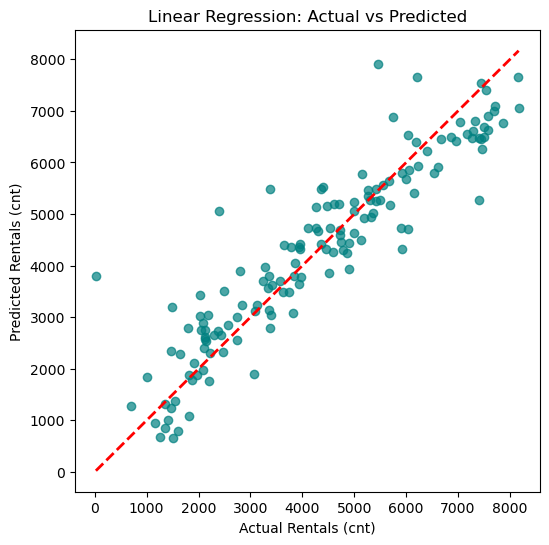

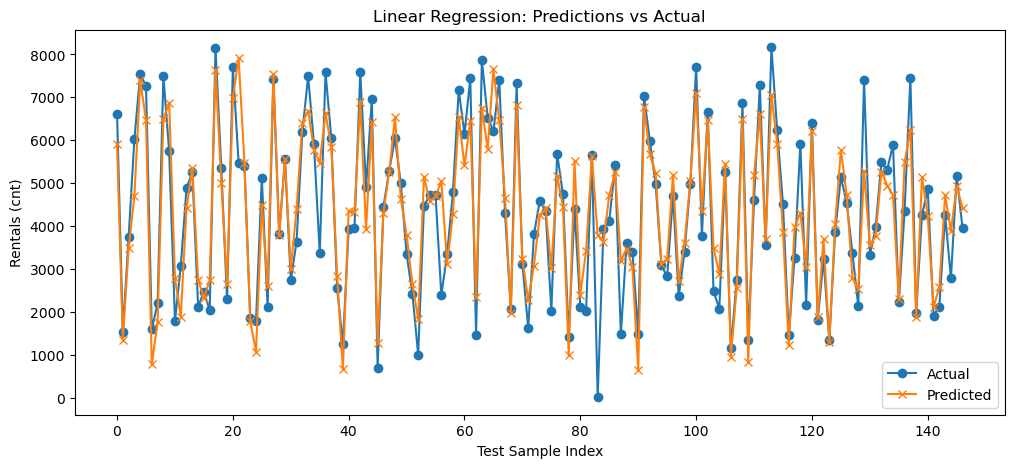

In [17]:
import matplotlib.pyplot as plt

# Scatter Plot: Actual vs Predicted 

plt.figure(figsize=(6,6))

plt.scatter(y_test, y_pred_lin, alpha=0.7, color="teal")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.xlabel("Actual Rentals (cnt)")
plt.ylabel("Predicted Rentals (cnt)")
plt.title("Linear Regression: Actual vs Predicted")

plt.show()

# Line Plot: Actual vs Predicted over Test Set 

plt.figure(figsize=(12,5))

plt.plot(y_test.values, label="Actual", marker='o')
plt.plot(y_pred_lin, label="Predicted", marker='x')

plt.xlabel("Test Sample Index")
plt.ylabel("Rentals (cnt)")
plt.title("Linear Regression: Predictions vs Actual")
plt.legend()

plt.show()


#### Model 2 : Random Forest Regression

In [19]:
from sklearn.ensemble import RandomForestRegressor


rf = RandomForestRegressor(random_state=42, n_estimators=100)


rf.fit(X_train_transformed, y_train)


y_pred_rf = rf.predict(X_test_transformed)


mae_rf = mean_absolute_error(y_test, y_pred_rf)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Results:")
print("\nMAE:", mae_rf)
print("\nRMSE:", rmse_rf)
print("\nR²:", r2_rf)


Random Forest Results:

MAE: 445.08265306122445

RMSE: 691.4265055454183

R²: 0.8807768961368607


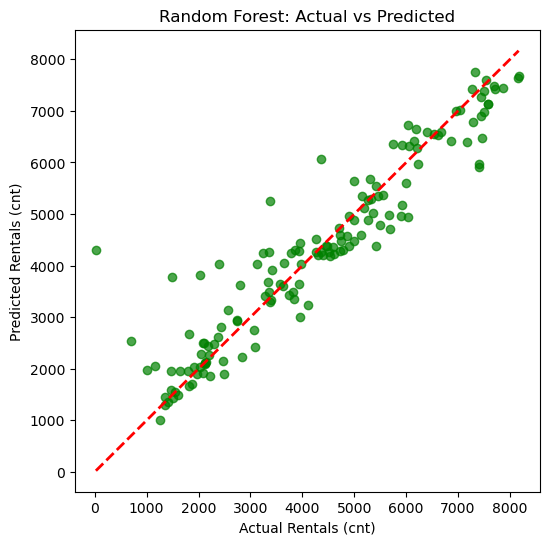

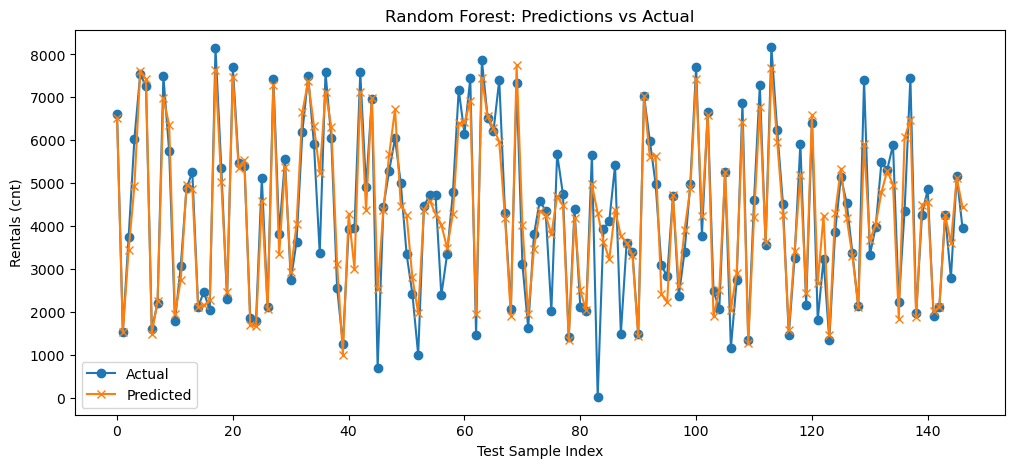

In [20]:
# Scatter Plot: Actual vs Predicted 

plt.figure(figsize=(6,6))

plt.scatter(y_test, y_pred_rf, alpha=0.7, color="green")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.xlabel("Actual Rentals (cnt)")
plt.ylabel("Predicted Rentals (cnt)")
plt.title("Random Forest: Actual vs Predicted")

plt.show()

#  Line Plot: Actual vs Predicted over Test Set 

plt.figure(figsize=(12,5))

plt.plot(y_test.values, label="Actual", marker='o')
plt.plot(y_pred_rf, label="Predicted", marker='x')

plt.xlabel("Test Sample Index")
plt.ylabel("Rentals (cnt)")
plt.title("Random Forest: Predictions vs Actual")
plt.legend()

plt.show()


#### Model 3 : Decision Tree

In [22]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)

dt.fit(X_train_transformed, y_train)

y_pred_dt = dt.predict(X_test_transformed)


mae_dt = mean_absolute_error(y_test, y_pred_dt)

rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))

r2_dt = r2_score(y_test, y_pred_dt)


print("Decision Tree Results:")
print("\nMAE:", mae_dt)
print("\nRMSE:", rmse_dt)
print("\nR²:", r2_dt)


Decision Tree Results:

MAE: 633.2517006802722

RMSE: 984.4673963223814

R²: 0.7583031159839503


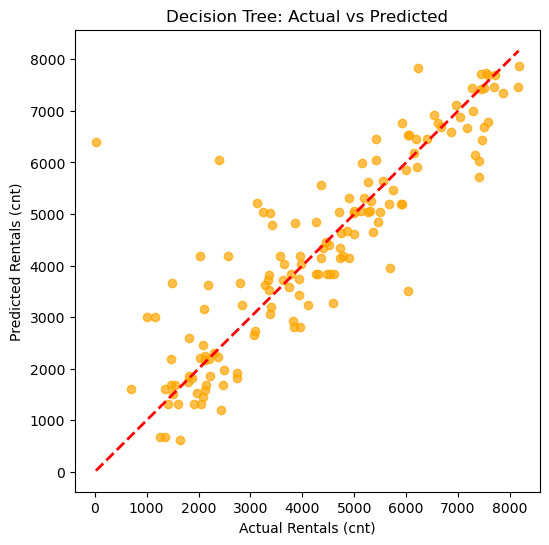

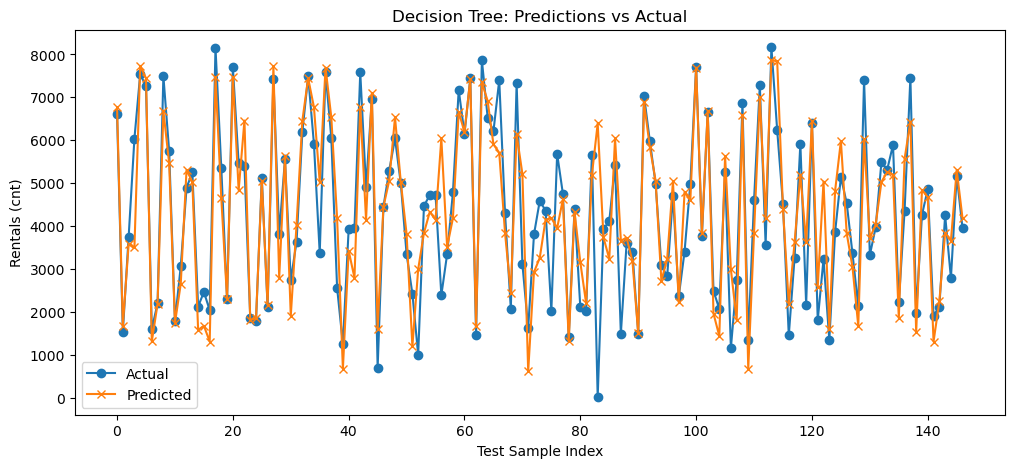

In [23]:
# Scatter Plot: Actual vs Predicted 

plt.figure(figsize=(6,6))

plt.scatter(y_test, y_pred_dt, alpha=0.7, color="orange")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.xlabel("Actual Rentals (cnt)")
plt.ylabel("Predicted Rentals (cnt)")
plt.title("Decision Tree: Actual vs Predicted")

plt.show()

#  Line Plot: Actual vs Predicted over Test Set

plt.figure(figsize=(12,5))

plt.plot(y_test.values, label="Actual", marker='o')
plt.plot(y_pred_dt, label="Predicted", marker='x')

plt.xlabel("Test Sample Index")
plt.ylabel("Rentals (cnt)")
plt.title("Decision Tree: Predictions vs Actual")
plt.legend()

plt.show()


#### Model 4 : Gradient Boosting Regressor

In [25]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42, n_estimators=200, learning_rate=0.1, max_depth=3)


gbr.fit(X_train_transformed, y_train)


y_pred_gbr = gbr.predict(X_test_transformed)


mae_gbr = mean_absolute_error(y_test, y_pred_gbr)

rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))

r2_gbr = r2_score(y_test, y_pred_gbr)

print("Gradient Boosting Regressor Results:")
print("\nMAE:", mae_gbr)
print("\nRMSE:", rmse_gbr)
print("\nR²:", r2_gbr)


Gradient Boosting Regressor Results:

MAE: 447.7834162989899

RMSE: 656.3337023384073

R²: 0.8925719265995169


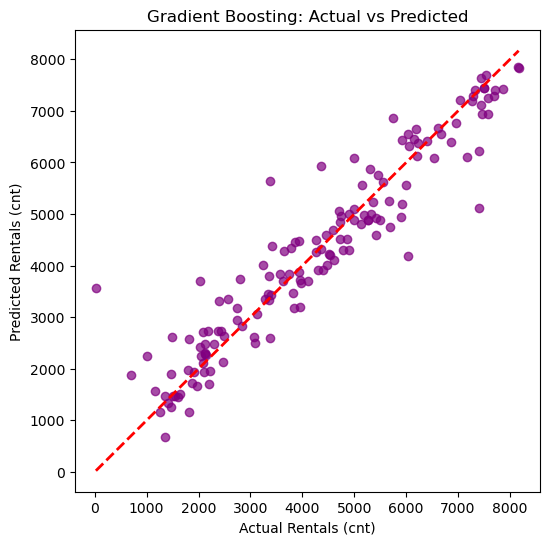

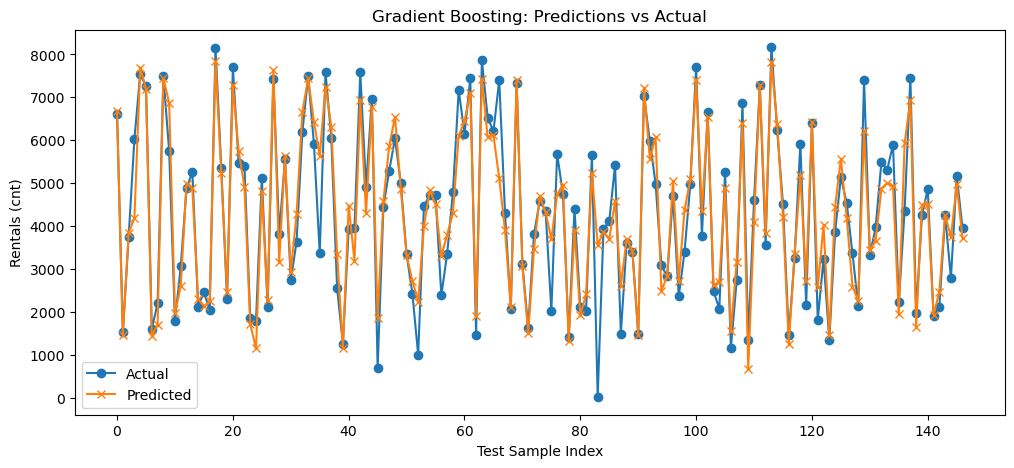

In [26]:
#  Scatter Plot: Actual vs Predicted 

plt.figure(figsize=(6,6))

plt.scatter(y_test, y_pred_gbr, alpha=0.7, color="purple")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.xlabel("Actual Rentals (cnt)")
plt.ylabel("Predicted Rentals (cnt)")
plt.title("Gradient Boosting: Actual vs Predicted")

plt.show()

# Line Plot: Actual vs Predicted over Test Set 

plt.figure(figsize=(12,5))

plt.plot(y_test.values, label="Actual", marker='o')
plt.plot(y_pred_gbr, label="Predicted", marker='x')

plt.xlabel("Test Sample Index")
plt.ylabel("Rentals (cnt)")
plt.title("Gradient Boosting: Predictions vs Actual")
plt.legend()

plt.show()


#### Results Recap (all 4 models)

| Model                 | MAE ↓ | RMSE ↓ | R² ↑     |
| --------------------- | ----- | ------ | -------- |
| **Linear Regression** | \~580 | \~791  | 0.84     |
| **Decision Tree**     | \~633 | \~984  | 0.76     |
| **Random Forest**     | \~445 | \~691  | 0.88     |
| **Gradient Boosting** | \~448 | \~656  | **0.89** |


#### Random Forest — GridSearchCV (5-fold, optimize MAE)

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np



categorical_features = ["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]

numeric_features = ["temp", "atemp", "hum", "windspeed"]


preprocessor_cv = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numeric_features),
    ],
    remainder='drop'
)


rf_pipe = Pipeline(steps=[
    ('pre', preprocessor_cv),
    ('model', RandomForestRegressor(random_state=42))
])


param_grid = {
    'model__n_estimators': [200, 400],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2],
    'model__max_features': ['sqrt', 'log2', None],
}


grid_rf = GridSearchCV(
    estimator=rf_pipe,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=5,
    n_jobs=-1,
    verbose=0,
    refit=True  # refit best params on the full training set
)


grid_rf.fit(X_train, y_train)

print("Best RF params:", grid_rf.best_params_)
print("\nBest 5-fold CV MAE:", -grid_rf.best_score_)


Best RF params: {'model__max_depth': 20, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 400}

Best 5-fold CV MAE: 485.9186983324803


In [31]:
# Evaluate once on TEST (final RF)

best_rf = grid_rf.best_estimator_
y_pred_rf_tuned = best_rf.predict(X_test)

mae_rf_tuned = mean_absolute_error(y_test, y_pred_rf_tuned)
rmse_rf_tuned = np.sqrt(mean_squared_error(y_test, y_pred_rf_tuned))
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)

print("\nRandom Forest (tuned) — Test set:")
print("\nMAE:", mae_rf_tuned)
print("\nRMSE:", rmse_rf_tuned)
print("\nR²:", r2_rf_tuned)


Random Forest (tuned) — Test set:

MAE: 469.01787476722296

RMSE: 708.0107645497035

R²: 0.8749890379212756


#### Linear Regression — GridSearchCV with CV

In [33]:
from sklearn.linear_model import LinearRegression


lin_pipe = Pipeline(steps=[
    ('pre', preprocessor_cv),
    ('model', LinearRegression())
])


param_grid_lin = {
    'model__fit_intercept': [True, False],
    #'model__positive': [True, False]
}

grid_lin = GridSearchCV(estimator=lin_pipe, param_grid=param_grid_lin, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1, refit=True, error_score='raise')

grid_lin.fit(X_train, y_train)

print("Best Linear Regression params:", grid_lin.best_params_)
print("\nBest 5-fold CV MAE:", -grid_lin.best_score_)



best_lin = grid_lin.best_estimator_

y_pred_lin_tuned = best_lin.predict(X_test)

mae_lin_tuned = mean_absolute_error(y_test, y_pred_lin_tuned)

rmse_lin_tuned = np.sqrt(mean_squared_error(y_test, y_pred_lin_tuned))

r2_lin_tuned = r2_score(y_test, y_pred_lin_tuned)

print("\nLinear Regression (tuned) — Test set:")
print("\nMAE:", mae_lin_tuned)
print("\nRMSE:", rmse_lin_tuned)
print("\nR²:", r2_lin_tuned)


Best Linear Regression params: {'model__fit_intercept': False}

Best 5-fold CV MAE: 590.2548534715761

Linear Regression (tuned) — Test set:

MAE: 582.4663538182951

RMSE: 798.8864282026942

R²: 0.8408383390745574


#### Gradient Boosting Regressor — GridSearchCV with CV

In [44]:
from sklearn.ensemble import GradientBoostingRegressor


gbr_pipe = Pipeline(steps=[
    ('pre', preprocessor_cv),
    ('model', GradientBoostingRegressor(random_state=42))
])


param_grid_gbr = {
    'model__n_estimators': [100, 200, 300],
    'model__learning_rate': [0.05, 0.1, 0.2],
    'model__max_depth': [2, 3, 4],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2]
}

grid_gbr = GridSearchCV(
    estimator=gbr_pipe,
    param_grid=param_grid_gbr,
    scoring='neg_mean_absolute_error',
    cv=5,
    n_jobs=-1,
    refit=True
)

grid_gbr.fit(X_train, y_train)

print("Best GBR params:", grid_gbr.best_params_)
print("\nBest 5-fold CV MAE:", -grid_gbr.best_score_)

# Evaluate on test set

best_gbr = grid_gbr.best_estimator_

y_pred_gbr_tuned = best_gbr.predict(X_test)

mae_gbr_tuned = mean_absolute_error(y_test, y_pred_gbr_tuned)

rmse_gbr_tuned = np.sqrt(mean_squared_error(y_test, y_pred_gbr_tuned))

r2_gbr_tuned = r2_score(y_test, y_pred_gbr_tuned)

print("\nGradient Boosting (tuned) — Test set:")
print("\nMAE:", mae_gbr_tuned)
print("\nRMSE:", rmse_gbr_tuned)
print("\nR²:", r2_gbr_tuned)


Best GBR params: {'model__learning_rate': 0.1, 'model__max_depth': 4, 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'model__n_estimators': 100}

Best 5-fold CV MAE: 481.41305946591945

Gradient Boosting (tuned) — Test set:

MAE: 438.48831781832723

RMSE: 641.9982771752585

R²: 0.8972134945034506


#### Final Results (after GridSearchCV + 5 fold CV)

| Model                 | Best Params                                                                            | CV MAE ↓ | Test MAE ↓ | Test RMSE ↓ | Test R² ↑ |
| --------------------- | ---------------------------------------------------------------------------------------------- | -------- | ---------- | ----------- | --------- |
| **Linear Regression** |  fit_intercept=False                                                                           | ~590     | ~582       | ~799        | 0.84      |
| **Decision Tree**     | *( baseline tree)*                                                                   | —        | ~633       | ~984        | 0.76      |
| **Random Forest**     |  n_estimators=400, max_depth=20, max_features='sqrt', min_samples_split=2, min_samples_leaf=1  | ~486     | ~469       | ~708        | 0.87      |
| **Gradient Boosting** |  n_estimators=100, learning_rate=0.1, max_depth=4, min_samples_split=5, min_samples_leaf=1     | ~481     | ~438       | ~642        | **0.90**  |


In [46]:
from joblib import dump

# Alias for clarity
best_gbr_daily = best_gbr  

dump(best_gbr_daily, "gbr_daily_pipeline.joblib")
print("Saved: gbr_daily_pipeline.joblib")



Saved: gbr_daily_pipeline.joblib
